# Building Footprint Extraction From GHSL Data & Height Estimation
Extracted building footprints for a specific region using OSM. Visualize downloaded data.
Calculate Building Area & Generate Centroids
GHSL data download from Google Earth Engine using Kolkata Shapefile from GEE and Reproject it to 4326 Wgs 1984.
Fetch Build height from reprojected Raster data and add 'height_m' column, after that calculate Latitude Longitude Values based on Centroides shapefile layer to output shapefile layer. After completing whole process will Visualize Final Building Footprint with Height Data. After that will Export Final Excel and CSV data file of Each Buildings. This is the whole process to fetch 'Building Footprint Extraction From GHSL Data & Height Estimation'.

https://human-settlement.emergency.copernicus.eu/

Here i uased 'GHS built-up height' data 

## Fetch Building Footprints

In [2]:
import osmnx as ox
import geopandas as gpd

# Define the location
place_name = "Kolkata"  # Change this to any city/country

# Fetch buildings from OSM
buildings = ox.features_from_place(place_name, tags={"building": True})

# Filter only polygon geometries (exclude points and lines)
buildings = buildings[buildings.geometry.type.isin(["Polygon", "MultiPolygon"])]

# Save as shapefile
output_path = "/Users/monmita/Desktop/MonmitaMukherjee/Python(GIS)/P001/building_footprints.shp"
buildings.to_file(output_path)

print(buildings.head())


/var/folders/02/_0n7j2yn2rv67cf5mg8lz3800000gn/T/ipykernel_80929/3163742167.py:15: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  buildings.to_file(output_path)
/opt/homebrew/lib/python3.12/site-packages/pyogrio/raw.py:709: RuntimeWarning: Normalized/laundered field name: 'addr:housename' to 'addr_house'
  ogr_write(
/opt/homebrew/lib/python3.12/site-packages/pyogrio/raw.py:709: RuntimeWarning: Normalized/laundered field name: 'addr:street' to 'addr_stree'
  ogr_write(
/opt/homebrew/lib/python3.12/site-packages/pyogrio/raw.py:709: RuntimeWarning: Normalized/laundered field name: 'building:levels' to 'building_l'
  ogr_write(
/opt/homebrew/lib/python3.12/site-packages/pyogrio/raw.py:709: RuntimeWarning: Normalized/laundered field name: 'addr:city' to 'addr_city'
  ogr_write(
/opt/homebrew/lib/python3.12/site-packages/pyogrio/raw.py:709: RuntimeWarning: Normalized/laundered field name: 'addr:postcode' to 'addr_postc'
  ogr_write(
/op

                                                           geometry  \
element  id                                                           
relation 2564978  POLYGON ((88.33645 22.52476, 88.33641 22.52444...   
         2900062  POLYGON ((88.3515 22.55834, 88.3514 22.55746, ...   
         3501020  POLYGON ((88.34312 22.56566, 88.34318 22.56566...   
         3501021  POLYGON ((88.38728 22.57353, 88.38726 22.57355...   
         5332393  POLYGON ((88.36234 22.46488, 88.3623 22.46479,...   

                 addr:housename                         addr:street  building  \
element  id                                                                     
relation 2564978            NaN                                 NaN       yes   
         2900062            NaN  Jawaharlal Nehru Road, Park Street       yes   
         3501020            NaN                    Eden Garden Road   stadium   
         3501021            NaN                                 NaN  hospital   
         5332393

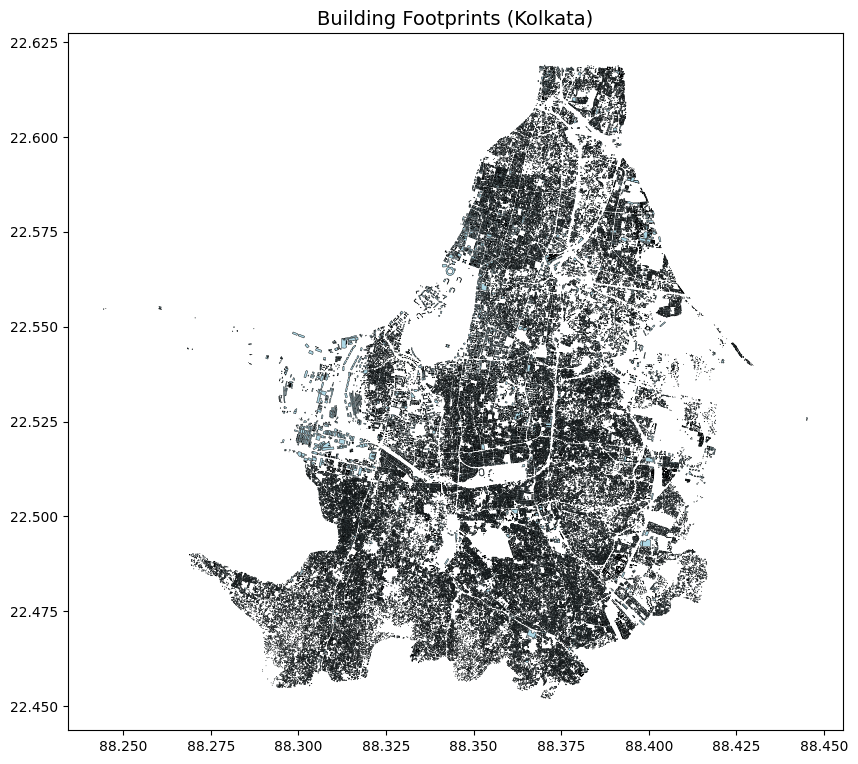

In [15]:
# Load the shapefile
shapefile_path = "/Users/monmita/Desktop/MonmitaMukherjee/Python(GIS)/P001/building_footprints.shp"
buildings = gpd.read_file(shapefile_path)

# Plot the building footprints
fig, ax = plt.subplots(figsize=(10, 10))
buildings.plot(ax=ax, color="lightblue", edgecolor="black", linewidth=0.3)

# Add title
plt.title("Building Footprints (Kolkata)", fontsize=14)

# Show plot
plt.show()


# Calculate Building Area & Generate Centroids

In [4]:
import osmnx as ox
import geopandas as gpd

# Define the location
place_name = "Kolkata"  # Change this to any city/country

# Fetch buildings from OSM
buildings = ox.features_from_place(place_name, tags={"building": True})

# Filter only polygon geometries (exclude points and lines)
buildings = buildings[buildings.geometry.type.isin(["Polygon", "MultiPolygon"])]

# Calculate building area in square meters
buildings = buildings.to_crs(epsg=3857)  # Convert to metric projection
buildings["area_sqm"] = buildings.geometry.area

# Calculate centroids separately
centroids = buildings.copy()
centroids["geometry"] = centroids.geometry.centroid  # Assign centroid as new geometry

# Convert back to WGS 84 for saving
buildings = buildings.to_crs(epsg=4326)
centroids = centroids.to_crs(epsg=4326)

# Save the building footprints with area
buildings.to_file("/Users/monmita/Desktop/MonmitaMukherjee/Python(GIS)/P001/building_with_area.shp")

# Save centroids separately
centroids.to_file("/Users/monmita/Desktop/MonmitaMukherjee/Python(GIS)/P001/building_centroids.shp")

print("Shapefiles saved successfully!")


/var/folders/02/_0n7j2yn2rv67cf5mg8lz3800000gn/T/ipykernel_80929/3725633908.py:26: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  buildings.to_file("/Users/monmita/Desktop/MonmitaMukherjee/Python(GIS)/P001/building_with_area.shp")
/opt/homebrew/lib/python3.12/site-packages/pyogrio/raw.py:709: RuntimeWarning: Normalized/laundered field name: 'addr:housename' to 'addr_house'
  ogr_write(
/opt/homebrew/lib/python3.12/site-packages/pyogrio/raw.py:709: RuntimeWarning: Normalized/laundered field name: 'addr:street' to 'addr_stree'
  ogr_write(
/opt/homebrew/lib/python3.12/site-packages/pyogrio/raw.py:709: RuntimeWarning: Normalized/laundered field name: 'building:levels' to 'building_l'
  ogr_write(
/opt/homebrew/lib/python3.12/site-packages/pyogrio/raw.py:709: RuntimeWarning: Normalized/laundered field name: 'addr:city' to 'addr_city'
  ogr_write(
/opt/homebrew/lib/python3.12/site-packages/pyogrio/raw.py:709: RuntimeWarning: Normalized/

Shapefiles saved successfully!


/opt/homebrew/lib/python3.12/site-packages/pyogrio/raw.py:709: RuntimeWarning: 2GB file size limit reached for /Users/monmita/Desktop/MonmitaMukherjee/Python(GIS)/P001/building_centroids.dbf. Going on, but might cause compatibility issues with third party software
  ogr_write(


# GHSL data download from Google Earth Engine using Kolkata Shapefile

In [ ]:
# // Load the GHSL building height dataset for 2018
# var image = ee.Image("JRC/GHSL/P2023A/GHS_BUILT_H/2018");

# // Select the 'built_height' band for the building height
# var built = image.select('built_height');

# // Define visualization parameters
# var visParams = {
#   min: 0.0,
#   max: 12.0,
#   palette: ['000000', '0d0887', '7e03a8', 'cc4778', 'f89540', 'f0f921'],
# };

# // Set the map center to Kolkata
# Map.setCenter(88.3416, 22.5904, 10);

# // Add the building height layer to the map
# Map.addLayer(built, visParams, 'Average building height [m], 2018');

# // Load the Kolkata shapefile from your assets
# var kolkataShapefile = ee.FeatureCollection("projects/ee-monmita1998/assets/kolkata");

# // Clip the dataset to the Kolkata shapefile
# var kolkataBuiltHeight = built.clip(kolkataShapefile);

# // Export the image to your Google Drive
# Export.image.toDrive({
#   image: kolkataBuiltHeight,
#   description: 'Kolkata_Built_Height_2018',
#   folder: 'EarthEngineExports',  // Specify the folder in Google Drive
#   fileNamePrefix: 'Kolkata_Built_Height_2018',  // Name prefix for the output file
#   region: kolkataShapefile,  // Use the shapefile as the region
#   scale: 30,  // Resolution in meters
#   fileFormat: 'GeoTIFF'  // File format (GeoTIFF is commonly used for raster data)
# });


# Reprojection of 'Kolkata_Built_Height_2018_30m.tif' Raster data

In [ ]:
# Reprojection to 4326 WGS 1984 : 'Kolkata_Built_Height_2018_30m.tif'

In [24]:
import rasterio
from rasterio.warp import calculate_default_transform, reproject
from rasterio.enums import Resampling

# Path to the GHSL building height raster
ghsl_height_raster = "/Users/monmita/Desktop/MonmitaMukherjee/Python(GIS)/P001/Kolkata_Built_Height_2018_30m.tif"
output_raster = "/Users/monmita/Desktop/MonmitaMukherjee/Python(GIS)/P001/Kolkata_Built_Height_2018_Reproj.tif"

# Open the original raster file
with rasterio.open(ghsl_height_raster) as src:
    # Get the transformation and CRS of the new projection
    transform, width, height = calculate_default_transform(
        src.crs,  # current CRS
        'EPSG:4326',  # target CRS
        src.width, 
        src.height, 
        *src.bounds  # use bounds of the original raster
    )
    
    # Reproject the raster data
    with rasterio.open(
        output_raster, 
        'w', 
        driver='GTiff', 
        height=height, 
        width=width, 
        count=src.count,  # number of bands
        dtype=src.dtypes[0],  # datatype of the raster
        crs='EPSG:4326',  # target CRS
        transform=transform  # new transformation
    ) as dst:
        for i in range(1, src.count + 1):  # loop through all bands
            reproject(
                source=rasterio.band(src, i),
                destination=rasterio.band(dst, i),
                src_transform=src.transform,
                src_crs=src.crs,
                dst_transform=transform,
                dst_crs='EPSG:4326',
                resampling=Resampling.nearest  # or use other resampling methods
            )

print(f"Reprojected raster saved as {output_raster}")


Reprojected raster saved as /Users/monmita/Desktop/MonmitaMukherjee/Python(GIS)/P001/Kolkata_Built_Height_2018_Reproj.tif


# Fetch Building Heights from 'Kolkata_Built_Height_2018_Reproj.tif' Raster

In [29]:
# fetch built up details from 'Kolkata_Built_Height_2018_Reproj.tif' raster
# and will add a new column to output shapefile as 'height_m' where hight data will store according to 
# building centroides 

In [26]:
import rasterio
import geopandas as gpd
import numpy as np

# Load building centroids (instead of building footprints)
centroids = gpd.read_file("/Users/monmita/Desktop/MonmitaMukherjee/Python(GIS)/P001/building_centroids.shp")

# Path to GHSL building height raster
ghsl_height_raster = "/Users/monmita/Desktop/MonmitaMukherjee/Python(GIS)/P001/Kolkata_Built_Height_2018_Reproj.tif"

# Function to extract height from GHSL raster at centroid locations
def get_ghsl_height(raster_path, points):
    with rasterio.open(raster_path) as src:
        # Extract height for each point (centroid)
        heights = [next(src.sample([(p.x, p.y)]))[0] for p in points]
    return np.array(heights)

# Extract building height from GHSL using the centroids
centroids["height_m"] = get_ghsl_height(ghsl_height_raster, centroids.geometry.centroid)

# Save the output to a new shapefile
centroids.to_file("/Users/monmita/Desktop/MonmitaMukherjee/Python(GIS)/P001/centroids_with_heights.shp")

# Print out the first few entries of the heights
print(centroids[["height_m"]].head())


    height_m
0  14.636721
1  18.795345
2  14.239660
3  11.817236
4   8.082994


'centroids_with_heights.shp' and 'building_footprints.shp' layer that i have . I want to store 'height_m' column data to 'building_footprints.shp' based on 'id' column. 'id' colimn is unique id for both layer. and will generate a 'building_footprint_with_height_in_m.shp' layer as final output layer. Also will calculate and add Latitude Longitude column to output layer 'building_footprint_with_height_in_m.shp' based on centroides lat long location.

In [31]:
import geopandas as gpd

# Load the building footprints shapefile
building_footprints = gpd.read_file("/Users/monmita/Desktop/MonmitaMukherjee/Python(GIS)/P001/building_footprints.shp")

# Load the centroids with height data shapefile
centroids_with_heights = gpd.read_file("/Users/monmita/Desktop/MonmitaMukherjee/Python(GIS)/P001/centroids_with_heights.shp")

# Merge both layers based on the 'id' column
# This will add the 'height_m' column from centroids_with_heights to building_footprints
building_footprints_with_height = building_footprints.merge(centroids_with_heights[['id', 'height_m']], on='id', how='left')

# Calculate Latitude and Longitude based on the centroid of the geometries
building_footprints_with_height['Longitude'] = building_footprints_with_height.geometry.centroid.x
building_footprints_with_height['Latitude'] = building_footprints_with_height.geometry.centroid.y

# Save the merged result to a new shapefile
building_footprints_with_height.to_file("/Users/monmita/Desktop/MonmitaMukherjee/Python(GIS)/P001/building_footprint_with_height_in_m.shp")

# Print out the first few entries of the resulting shapefile
print(building_footprints_with_height[['id', 'height_m', 'Longitude', 'Latitude']].head())


        id   height_m  Longitude   Latitude
0  2564978  14.636721  88.336819  22.524514
1  2900062  18.795345  88.350991  22.557727
2  3501020  14.239660  88.343276  22.564664
3  3501021  11.817236  88.387423  22.573678
4  5332393   8.082994  88.362277  22.464850


# Visualize Final Building Footprint with Height Data

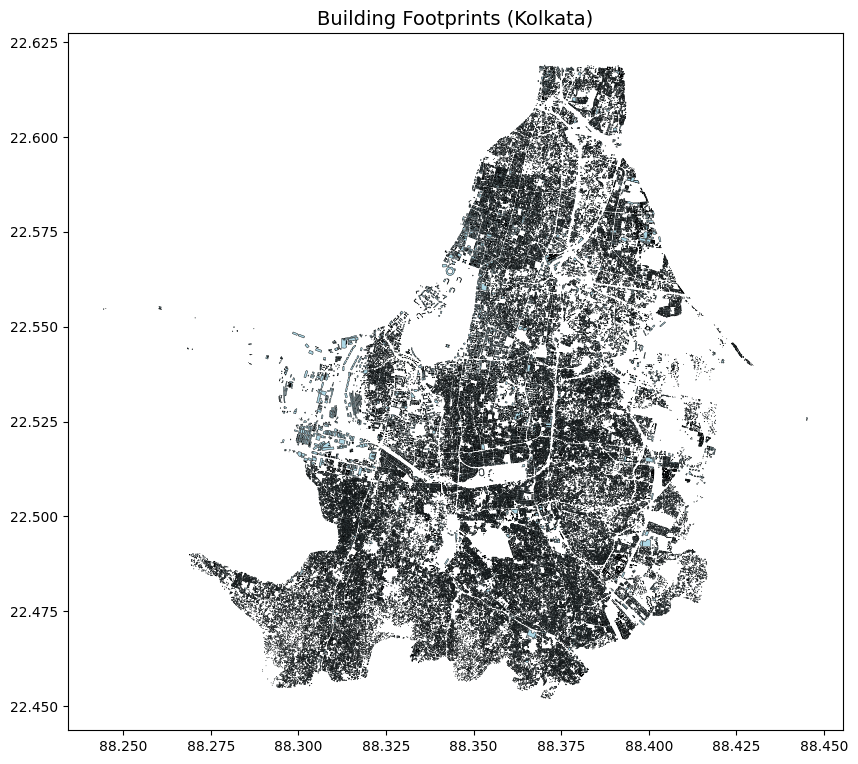

In [32]:
# Load the shapefile
shapefile_path = "/Users/monmita/Desktop/MonmitaMukherjee/Python(GIS)/P001/building_footprint_with_height_in_m.shp"
buildings = gpd.read_file(shapefile_path)

# Plot the building footprints
fig, ax = plt.subplots(figsize=(10, 10))
buildings.plot(ax=ax, color="lightblue", edgecolor="black", linewidth=0.3)

# Add title
plt.title("Building Footprints (Kolkata)", fontsize=14)

# Show plot
plt.show()


# Export Final Excel and CSV data file of Each Buildings :

In [34]:
# Load the final building footprint shapefile with height and coordinates
final_layer = gpd.read_file("/Users/monmita/Desktop/MonmitaMukherjee/Python(GIS)/P001/building_footprint_with_height_in_m.shp")

# Select only the required columns
final_data = final_layer[['id', 'height_m', 'Latitude', 'Longitude']]

# Define output file paths
csv_output_path = "/Users/monmita/Desktop/MonmitaMukherjee/Python(GIS)/P001/building_footprint_with_height.csv"
excel_output_path = "/Users/monmita/Desktop/MonmitaMukherjee/Python(GIS)/P001/building_footprint_with_height.xlsx"

# Export to CSV
final_data.to_csv(csv_output_path, index=False)

# Export to Excel
final_data.to_excel(excel_output_path, index=False, engine='openpyxl')

# Print confirmation
print(f"CSV file saved at: {csv_output_path}")
print(f"Excel file saved at: {excel_output_path}")


CSV file saved at: /Users/monmita/Desktop/MonmitaMukherjee/Python(GIS)/P001/building_footprint_with_height.csv
Excel file saved at: /Users/monmita/Desktop/MonmitaMukherjee/Python(GIS)/P001/building_footprint_with_height.xlsx
